# 2018 Mashine Learning course at the Faculty of Physics, Astronomy and Applied Computer Science

## Lab class no. 2 - Classification
by Piotr Warchoł


This is an amalgamation of a couple opensource notebooks from the web, with some adjustments.

Today, lets work on two canonical datasets. The MNIST and the spam datasets.

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# To plot pretty figures
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np
#import os

import warnings
warnings.filterwarnings('ignore')


# to make this notebook's output stable across runs
np.random.seed(42)

## 1. MNIST 
The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.

In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
#number of pixels for each image
28*28

784

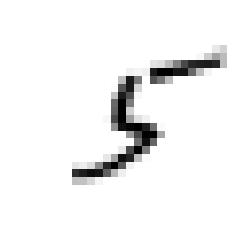

In [6]:
# lets look at one of the images
%matplotlib inline
import matplotlib
some_digit = X[35000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

In [7]:
#Lets plot more

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

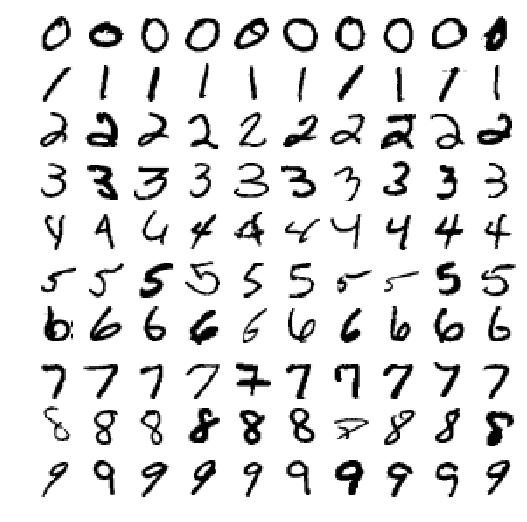

In [8]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()

In [9]:
#there was "artifiacial" order in the data so we shuffle it
shuffle_index = np.random.permutation(70000)
X, y = X[shuffle_index], y[shuffle_index]

In [10]:
#split for training and testing
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#### We will only try to adress the problm of is it a 5 or not with Logistic regression from sklearn
(perform just this binarry classification)

In [11]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [12]:
from sklearn.linear_model import LogisticRegression

logreg_clf = LogisticRegression(max_iter=5, random_state=42)
logreg_clf.fit(X_train, y_train_5)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

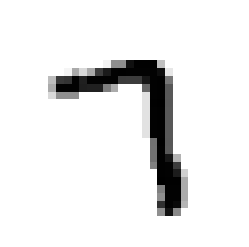

In [13]:
some_other_digit=X[2340]
plot_digit(some_other_digit)

In [14]:
# did we do ok? First, look at the example we showed as an image
logreg_clf.predict([some_other_digit])

array([False])

How did we do accros the whole training sample?

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(logreg_clf, X_train, y_train_5, cv=3, scoring="f1")

array([0.74875   , 0.7463995 , 0.74116523])

In [16]:
cross_val_score(logreg_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9598 , 0.9595 , 0.95935])

Lets look at the confussion matrix and calculate some accuracy metrics

In [17]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(logreg_clf, X_train, y_train_5, cv=3)
conf_mat=confusion_matrix(y_train_5, y_train_pred)
conf_mat

array([[54019,   578],
       [ 1849,  3554]])

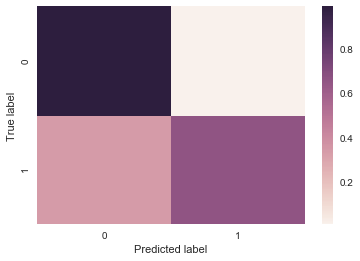

In [18]:
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

If the prediction was perfect

In [19]:
y_train_perfect_predictions = y_train_5
conf_mat_perf=confusion_matrix(y_train_5, y_train_perfect_predictions)
conf_mat_perf

array([[54597,     0],
       [    0,  5403]])

In [20]:
conf_mat_perf_normalized = conf_mat_perf.astype('float') / conf_mat_perf.sum(axis=1)[:, np.newaxis]

precision_score(y_train_5, y_train_pred).astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_perf_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

NameError: name 'precision_score' is not defined

Back to reality

In [24]:
from sklearn.metrics import precision_score, recall_score

In [25]:
precision_score(y_train_5, y_train_pred)

0.8601161665053243

In [26]:
recall_score(y_train_5, y_train_pred)

0.6577827133074218

#### Now check if you can correctly calculate the two "by hand", from the precission matrix

In [27]:
precision = (conf_mat[1,1]) / (conf_mat[:,1].sum())
recall = (conf_mat[1,1]) / (conf_mat[1,:].sum())
print('precision', precision)
print('recall', recall)

precision 0.8601161665053243
recall 0.6577827133074218


#### Check F1 score the same way, by hand and with sklearn

In [28]:
from sklearn.metrics import f1_score


print(f1_score(y_train_5, y_train_pred))
print(2 * (precision * recall) / (precision + recall))


0.7454640797063451
0.7454640797063451


Now, lets look at precission vs recal with respect to tresholding

In [29]:
y_scores = logreg_clf.decision_function([some_digit])
y_scores

array([1.78120632])

In [30]:
y_scores = cross_val_predict(logreg_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

Note: there is an [issue](https://github.com/scikit-learn/scikit-learn/issues/9589) introduced in Scikit-Learn 0.19.0 where the result of `cross_val_predict()` is incorrect in the binary classification case when using `method="decision_function"`, as in the code above. The resulting array has an extra first dimension full of 0s. We need to add this small hack for now to work around this issue:

In [31]:
y_scores.shape

(60000,)

In [32]:
# hack to work around issue #9589 introduced in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

In [33]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

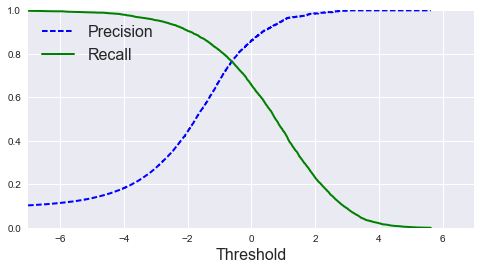

In [34]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-7, 7])

plt.show()

Obviously, we need to balance precission and reacall by assuming the proper treshold for predictions

In [35]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

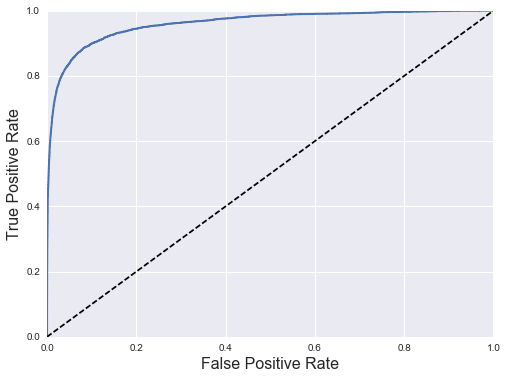

In [36]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

#### Now, produce the confussion matrix, calculate the F1 score, accuracy, precission recall and plot the ROC curve, for the TEST data
Are the results as good?

In [37]:
# The same on test dataset
y_test_pred = cross_val_predict(logreg_clf, X_test, y_test_5, cv=3)
conf_mat_test = confusion_matrix(y_test_5, y_test_pred)
conf_mat_test

array([[8994,   96],
       [ 314,  596]])

In [38]:
f1_score(y_test_5, y_test_pred)

0.7440699126092385

In [39]:
precision_test = (conf_mat_test[1,1]) / (conf_mat_test[:,1].sum())
recall_test = (conf_mat_test[1,1]) / (conf_mat_test[1,:].sum())
print(precision_test)
print(recall_test)

0.861271676300578
0.654945054945055


In [40]:
accuracy_test = (conf_mat_test[0,0] + conf_mat_test[1,1]) / conf_mat_test.sum()
accuracy_test

0.959

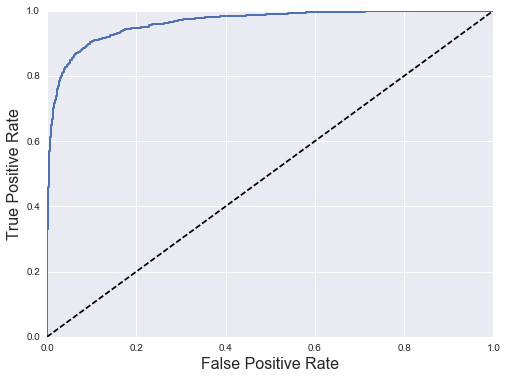

In [41]:
y_test_scores = cross_val_predict(logreg_clf, X_test, y_test_5, cv=3,
                             method="decision_function")

fpr_test, tpr_test, thresholds_test = roc_curve(y_test_5, y_test_scores)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_test, tpr_test)
plt.show()

## 2. Spam filtering

In [42]:
data = pd.read_csv("./spam.csv",encoding='latin-1')

In [43]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Let's drop the unwanted columns, and rename the column name appropriately.

In [44]:
#Drop column and name change
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":"label", "v2":"text"})

In [45]:
data.tail()

,label,text
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [46]:
#Count observations in each label
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [47]:
# convert label to a numerical variable
data['label_num'] = data.label.map({'ham':0, 'spam':1})

In [48]:
data.head()

,label,text,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


### Train Test Split
Before performing text transformation, let us do train test split. Infact, we can perform k-Fold cross validation. However, due to simplicity, I am doing train test split.

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test = train_test_split(data["text"],data["label"], test_size = 0.2, random_state = 10)

In [51]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457,)
(1115,)
(4457,)
(1115,)


### Text Transformation
Various text transformation techniques such as stop word removal, lowering the texts, tfidf transformations, prunning, stemming can be performed using sklearn.feature_extraction libraries. Then, the data can be convereted into bag-of-words. <br> <br>
For this problem, Let us see how our model performs without removing stop words.

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

see http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [53]:
vect = CountVectorizer()

Note : We can also perform tfidf transformation.

In [54]:
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

vect.fit function learns the vocabulary. We can get all the feature names from vect.get_feature_names( ). <br> <br> Let us print first, last twenty features and some from the middle

In [55]:
print(vect.get_feature_names()[0:20])
print(vect.get_feature_names()[1000:1010])
print(vect.get_feature_names()[-20:])

['00', '000', '000pes', '008704050406', '0089', '0121', '01223585236', '01223585334', '0125698789', '02', '0207', '02072069400', '02073162414', '02085076972', '021', '03', '04', '0430', '05', '050703']
['applying', 'appointment', 'appreciate', 'appreciated', 'approaches', 'approaching', 'appropriate', 'approve', 'approved', 'approx']
['zyada', 'åð', 'åòharry', 'åòit', 'åômorrow', 'åôrents', 'ì_', 'ì¼1', 'ìä', 'ìï', 'ó_', 'û_', 'û_thanks', 'ûªm', 'ûªt', 'ûªve', 'ûï', 'ûïharry', 'ûò', 'ûówell']


In [56]:
X_train_df = vect.transform(X_train)

Now, let's transform the Test data.

In [57]:
X_test_df = vect.transform(X_test)

In [58]:
type(X_test_df)

scipy.sparse.csr.csr_matrix

### Machine Learning models:

#### Multinomial Naive Bayes
Generally, Naive Bayes works well on text data. Multinomail Naive bayes is best suited for classification with discrete features. 

In [59]:
prediction = dict()
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_df,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [60]:
prediction["Multinomial"] = model.predict(X_test_df)

In [61]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [62]:
accuracy_score(y_test,prediction["Multinomial"])

0.9883408071748879

#### Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_df,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [64]:
prediction["Logistic"] = model.predict(X_test_df)

In [65]:
accuracy_score(y_test,prediction["Logistic"])

0.9802690582959641

#### $k$-NN classifier

In [66]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_df,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [67]:
prediction["knn"] = model.predict(X_test_df)

In [68]:
accuracy_score(y_test,prediction["knn"])

0.9121076233183857

### Parameter Tuning using GridSearchCV

Based, on the above four ML models, Naive Bayes has given the best accuracy. However, Let's try to tune the parameters of $k$-NN using GridSearchCV

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
k_range = np.arange(1,30)

In [53]:
k_range

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [54]:
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])}


In [55]:
model = KNeighborsClassifier()
grid = GridSearchCV(model,param_grid)
grid.fit(X_train_df,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [56]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [57]:
grid.best_params_

{'n_neighbors': 1}

In [58]:
grid.best_score_

0.9461521202602647

In [59]:
grid.grid_scores_

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.94615, std: 0.00449, params: {'n_neighbors': 1},
 mean: 0.92259, std: 0.00288, params: {'n_neighbors': 2},
 mean: 0.92349, std: 0.00226, params: {'n_neighbors': 3},
 mean: 0.90554, std: 0.00117, params: {'n_neighbors': 4},
 mean: 0.90621, std: 0.00065, params: {'n_neighbors': 5},
 mean: 0.89410, std: 0.00060, params: {'n_neighbors': 6},
 mean: 0.89455, std: 0.00062, params: {'n_neighbors': 7},
 mean: 0.88580, std: 0.00141, params: {'n_neighbors': 8},
 mean: 0.88602, std: 0.00142, params: {'n_neighbors': 9},
 mean: 0.88198, std: 0.00262, params: {'n_neighbors': 10},
 mean: 0.88198, std: 0.00262, params: {'n_neighbors': 11},
 mean: 0.87660, std: 0.00210, params: {'n_neighbors': 12},
 mean: 0.87705, std: 0.00230, params: {'n_neighbors': 13},
 mean: 0.87256, std: 0.00223, params: {'n_neighbors': 14},
 mean: 0.87278, std: 0.00253, params: {'n_neighbors': 15},
 mean: 0.87009, std: 0.00051, params: {'n_neighbors': 16},
 mean: 0.87009, std: 0.00051, params: {'n_neighbors': 17},
 mean:

### Model Evaluation

In [60]:
print(classification_report(y_test, prediction['Multinomial'], target_names = ["Ham", "Spam"]))

             precision    recall  f1-score   support

        Ham       0.99      0.99      0.99       965
       Spam       0.97      0.95      0.96       150

avg / total       0.99      0.99      0.99      1115



In [61]:
conf_mat = confusion_matrix(y_test, prediction['Multinomial'])
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

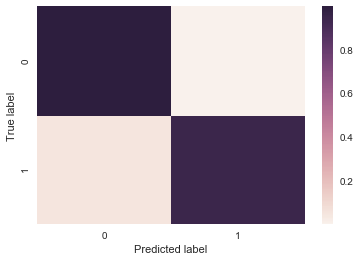

In [62]:
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Understand what happend
(note, this is for test data)

In [63]:
print(conf_mat)

[[960   5]
 [  8 142]]


By seeing the above confusion matrix, it is clear that 5 Ham are mis classified as Spam, and 8 Spam are misclassified as Ham. Let'see what are those misclassified text messages. Looking those messages may help us to come up with more advanced feature engineering.

In [64]:
pd.set_option('display.max_colwidth', -1)

I increased the pandas dataframe width to display the misclassified texts in full width. 

#### Misclassified as Spam

In [65]:
X_test[y_test < prediction["Multinomial"] ]

573     Waiting for your call.                                                                                                      
4727    I (Career Tel) have added u as a contact on INDYAROCKS.COM to send FREE SMS. To remove from phonebook - sms NO to  &lt;#&gt;
5475    Dhoni have luck to win some big title.so we will win:)                                                                      
4860    Nokia phone is lovly..                                                                                                      
1259    We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us                           
Name: text, dtype: object

#### Misclassfied as Ham

In [66]:
X_test[y_test > prediction["Multinomial"] ]

5035    You won't believe it but it's true. It's Incredible Txts! Reply G now to learn truly amazing things that will blow your mind. From O2FWD only 18p/txt       
2574    Your next amazing xxx PICSFREE1 video will be sent to you enjoy! If one vid is not enough for 2day text back the keyword PICSFREE1 to get the next video.   
3130    LookAtMe!: Thanks for your purchase of a video clip from LookAtMe!, you've been charged 35p. Think you can do better? Why not send a video in a MMSto 32323.
68      Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"                                                                            
2662    Hello darling how are you today? I would love to have a chat, why dont you tell me what you look like and what you are in to sexy?                          
4211    Missed call alert. These numbers called but left no message. 07008009200                                                                                    
3572    Yo

## Linear Discriminant analysis

- Implement a Linear discriminant analysis model for a p=1 (one dimensional) predictor and 2 classes.
- Train it on data points sampled from two partly overlapping Gaussian distributions associated with the classes.
- Plot histograms of data points used for training.
- Test it with aditional samples.
- Implement a function that will produce a confussion matrice (with precission and recall scores) based on the results of the model fitting to data.
- make the treshold adjustable
- produce the confussion matrix for 3 different tresholds.
- do the same for two, partly overlapping uniform distributions

In [69]:
import math

In [70]:
math.pi

3.141592653589793

In [71]:
ys = np.zeros([y.shape[0], 10])
ys[np.arange(y.shape[0]), y.astype(np.int32)] = 1
ys[:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [72]:
ys.sum()

70000.0

In [225]:
# Dataset for LDA

c1 = 2500
c2 = 1500
test_size = 800

ds_x = np.concatenate([
    np.random.normal(loc=1.5, scale=0.8, size=c1),
    np.random.normal(loc=-2.3, scale=1.2, size=c2)
])
ds_y = np.array([0] * c1 + [1] * c2)

permutation = np.arange(c1 + c2)
np.random.shuffle(permutation)

ds_x = ds_x[permutation]
ds_y = ds_y[permutation]

ds_x_test = ds_x[-test_size:]
ds_y_test = ds_y[-test_size:]
ds_x = ds_x[:-test_size]
ds_y = ds_y[:-test_size]

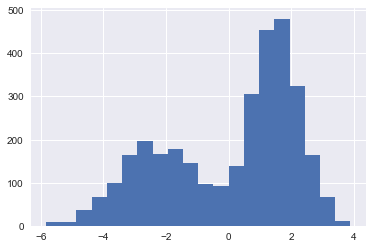

In [226]:
plt.hist(ds_x, bins=20)
plt.show()

In [227]:
# LDA

def gauss_at(mean, stddev, x):
    return 1 / (math.sqrt(2 * math.pi) * stddev) * math.exp(-0.5 / math.pow(stddev, 2) * math.pow(x - mean, 2))

# def get_p_k(pis, fs, k):
#     return pis[k] * fs[k] / np.sum(pis * fs)

def delta_k(means, stddevs, pis, x, k):
    return x * means[k] / math.pow(stddevs[k], 2) - math.pow(means[k], 2) / (2 * math.pow(stddevs[k], 2)) + np.log(pis[k])

class LDA:
    def __init__(self, classes):
        self.classes = classes
    
    def fit(self, x, y):
        self.means = [np.mean(x[y == k], axis=0) for k in range(self.classes)]
        self.stddevs = [np.std(x[y == k], axis=0) for k in range(self.classes)]
        self.pis = np.array([np.sum(y == k) for k in range(self.classes)]) / y.shape[0]
        
    def predict(self, x_test):
        deltas = np.array([delta_k(self.means, self.stddevs, self.pis, x_test, k) for k in range(self.classes)])
        return np.argmax(deltas, axis=0)

In [228]:
m = LDA(2)
m.fit(ds_x, ds_y)
r = m.predict(ds_x_test)


In [229]:
r[:20]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1])

In [230]:
ds_y_test[:20]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [231]:
np.sum(ds_y_test == r) / ds_y_test.shape[0]

0.98

([1.5031205764438478, -2.361053846492175],
 [0.7930603638255613, 1.217036706413735],
 array([0.625, 0.375]))

# Homework 2 

- Implement Naive Bayes model (remember about smoothing). 
- Find a reasonably interesting but not to complicated dataset for which you will be able to use this model to perform binary classification. Do the latter.
- Produce the confussion matrix, calculate accuracy, precission, recall
- Check how your model does against its version from sklearn and logistic regression from sklearn. 

In [484]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [414]:
# (code for dataset loading shared by Sylwester Klocek)

data = pd.read_csv('./titanic.csv')
data_count = len(data)
for i in range(data_count):
    if data.loc[i]['Freq'] > 0:
        data = data.append([data.loc[i]] * data.loc[i]['Freq'], ignore_index=True)   
        
data = data[data_count:]
data.drop(['Unnamed: 0', 'Freq'], axis=1, inplace=True)

In [415]:
len(data)

2201

In [416]:
data.head()

,Class,Sex,Age,Survived
32,3rd,Male,Child,No
33,3rd,Male,Child,No
34,3rd,Male,Child,No
35,3rd,Male,Child,No
36,3rd,Male,Child,No


In [486]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.loc[:, data.columns != "Survived"], data["Survived"],
                                                    test_size=0.2,
                                                    random_state=42)

In [487]:
x_train = x_train.as_matrix()
y_train = y_train.as_matrix()
x_test = x_test.as_matrix()
y_test = y_test.as_matrix()

In [488]:
def inc(d, v, step=1):
    if v not in d:
        d[v] = step
    else:
        d[v] += step
        
def get(d, v, default=0):
    if v not in d:
        return default
    return d[v]

class NaiveBayes:
    def __init__(self, classes):
        self.classes = np.array(classes)
        
    def fit(self, xs, ys):
        self.pis = np.array([np.sum(ys == k) for k in self.classes]) / len(ys)
        self.ds = [{} for _ in range(xs.shape[1])]
        self.xs = [{} for _ in range(xs.shape[1])]
        self.ys = {}
        for i, x in enumerate(xs):
            inc(self.ys, ys[i])
                
            for j, x_j in enumerate(x):
                inc(self.xs[j], x_j)
                inc(self.ds[j], (x_j, ys[i]))
                
        return self.ds, self.ys, self.xs
    
    def get_pks(self, x):
        return [np.prod([(get(self.ds[i], (x[i], k)) + 1) / (get(self.ys, k) + get(self.xs[i], x[i]))
                         for i in range(len(x))])
                for k in self.classes]
    
    def predict(self, xs):
        p = np.multiply(self.pis, [self.get_pks(x) for x in xs])
        return self.classes[np.argmax(p, axis=1)]

In [489]:
m = NaiveBayes(np.unique(y_train))
m.fit(x_train, y_train)

([{('1st', 'No'): 96,
   ('1st', 'Yes'): 166,
   ('2nd', 'No'): 123,
   ('2nd', 'Yes'): 96,
   ('3rd', 'No'): 412,
   ('3rd', 'Yes'): 146,
   ('Crew', 'No'): 559,
   ('Crew', 'Yes'): 162},
  {('Female', 'No'): 91,
   ('Female', 'Yes'): 278,
   ('Male', 'No'): 1099,
   ('Male', 'Yes'): 292},
  {('Adult', 'No'): 1145,
   ('Adult', 'Yes'): 522,
   ('Child', 'No'): 45,
   ('Child', 'Yes'): 48}],
 {'No': 1190, 'Yes': 570},
 [{'1st': 262, '2nd': 219, '3rd': 558, 'Crew': 721},
  {'Female': 369, 'Male': 1391},
  {'Adult': 1667, 'Child': 93}])

In [490]:
y_predicted = m.predict(x_test)

In [491]:
np.sum(y_predicted == y_test) / len(y_test)

0.7687074829931972

In [492]:
con_mat = confusion_matrix(y_test, y_predicted)

In [493]:
con_mat

array([[293,   7],
       [ 95,  46]])

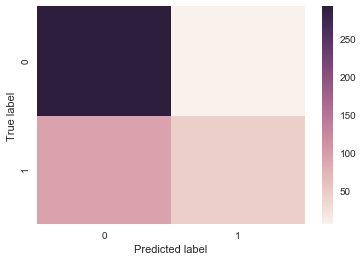

In [494]:
sns.heatmap(con_mat)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [479]:
accuracy_score(y_test, y_predicted)

0.8027210884353742

In [482]:
precision_score(y_test == 'Yes', y_predicted == 'Yes')

0.9016393442622951

In [483]:
recall_score(y_test == 'Yes', y_predicted == 'Yes')

0.40441176470588236

In [495]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

ValueError: could not convert string to float: 'Adult'